In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') #구글드라이브에 저장된 파일을 불러오기 위해 사용했습니다.

Mounted at /content/gdrive


삶의 만족도 데이터 준비

In [ ]:
oecd_bli = pd.read_csv("/content/gdrive/MyDrive/Project1/oecd_bli_2020.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()


Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,5.4,82.5,7.3,1.31,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,3.5,81.7,7.1,1.84,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,3.7,81.5,6.9,3.54,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,NaN,74.8,6.4,NaN,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,6.0,81.9,7.4,0.77,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [ ]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      7.1
Belgium      6.9
Brazil       6.4
Canada       7.4
Name: Life satisfaction, dtype: float64

1인당 GDP 데이터 준비

In [ ]:
gdp_per_capita = pd.read_excel("/content/gdrive/MyDrive/Project1/gdp_per_capita_2020.xlsx", thousands=',', na_values="n/a")
gdp_per_capita.rename(columns={2020: "GDP per capita"}, inplace=True) 
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",499.441,2019.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4898.277,2018.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3331.076,2019.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2021.310,2017.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14158.571,2011.0


데이터 병합

In [ ]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)

In [ ]:
full_country_stats.head(3)

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,73.0,18.12,43.0,36.1,13.7,NaN,NaN,18.0,NaN,57.5,4.7,16.46,NaN,88.0,NaN,NaN,NaN,NaN,14.92,73.0,67.0,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4735.747,2019.0
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,NaN,76.2,6.3,0.79,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5207.238,2019.0
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,NaN,74.8,6.4,NaN,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6450.451,2019.0


하위 3개 국가 (남아공, 콜롬비아, 브라질)

In [ ]:
full_country_stats.tail(3)

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ireland,7.0,1.0,82.0,5.25,67.0,75.9,0.7,25310.0,217130.0,20.0,7.8,81.8,7.0,3.23,47653.0,95.0,2.1,83.0,1.3,509.0,NaN,65.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",79668.502,2019.0
Switzerland,15.0,0.1,88.0,0.37,80.0,85.3,0.6,37466.0,NaN,22.0,NaN,83.7,7.5,1.82,62283.0,93.0,1.9,78.0,2.3,506.0,NaN,49.0,95.0,17.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",81867.462,2019.0
Luxembourg,12.0,0.5,77.0,3.82,66.0,75.8,0.6,39264.0,769053.0,21.0,1.7,82.8,6.9,2.35,63062.0,93.0,1.9,69.0,1.7,483.0,NaN,91.0,84.0,15.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",109602.322,2018.0


상위 3개 국가 (아일랜드, 스위스, 룩셈부르크)

In [ ]:
remove_indices = [1, 2, 4, 6, 37, 38, 39]                 # 7개 국가 제외
keep_indices = list(set(range(40)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices] 

missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

데이터 산점도

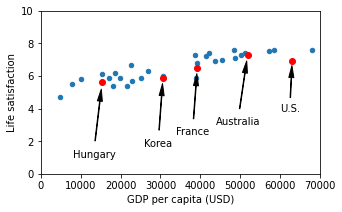

In [ ]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 70000, 0, 10])

position_text = {
  "Hungary": (8000, 1),
  "Korea": (26000, 1.7),
  "France": (34000, 2.4),
  "Australia": (44000, 3.0),
  "United States": (60000, 3.8),
}

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text, arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("GDP per capita (USD)")
plt.show()

In [ ]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,15372.885,5.6
Korea,30644.427,5.9
France,39257.434,6.5
Australia,51885.466,7.3
United States,63051.398,6.9


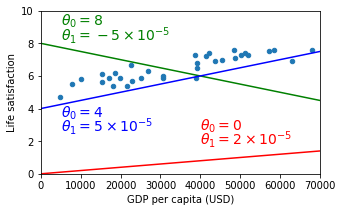

In [ ]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 70000, 0, 10])
X=np.linspace(0, 70000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

선형회귀 모델 훈련

In [ ]:
from sklearn import linear_model

lin1 = linear_model.LinearRegression()

Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]

lin1.fit(Xsample, ysample)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 절편과 기울기
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]

t0, t1

(5.071121853750363, 4.1410177424136694e-05)

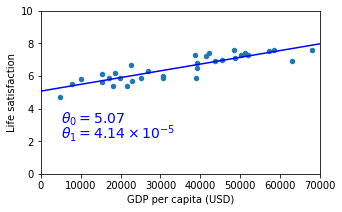

In [ ]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 70000, 0, 10])


X=np.linspace(0, 70000, 1000)
plt.plot(X, t0 + t1*X, "b")

plt.text(5000, 3.1, r"$\theta_0 = 5.07$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.14 \times 10^{-5}$", fontsize=14, color="b")

plt.show()

훈련된 모델 활용용련된 모델 활용

In [ ]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)

26240.048


In [ ]:
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

6.157726897048226

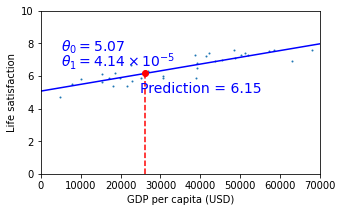

In [ ]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
plt.xlabel("GDP per capita (USD)")

# 예측된 최적의 직선
X=np.linspace(0, 70000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 70000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 5.07$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.14 \times 10^{-5}$", fontsize=14, color="b")

# 키프러스에 대한 삶의 만족도 예측값

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 6.15", fontsize=14, color="b")

plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.show()

**7개 국가 데이터 포함**

In [ ]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Colombia,5207.238,6.3
Brazil,6450.451,6.4
Mexico,8069.104,6.5
Chile,12612.322,6.5
Ireland,79668.502,7.0
Switzerland,81867.462,7.5
Luxembourg,109602.322,6.9


In [ ]:
position_text2 = {
    "Colombia": (1000, 9.0),
    "Brazil": (14000, 9.0),
    "Mexico": (23000, 9.0),
    "Chile": (33000, 9.0),
    "Ireland": (60000, 3.0),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

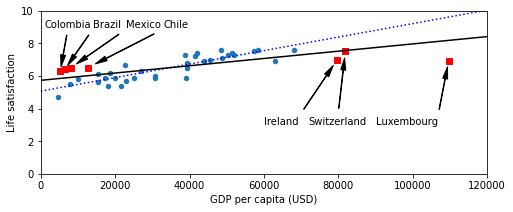

In [ ]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 120000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    # 7개 국가명 표기
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 120000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 120000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")


plt.show()

과대적합

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


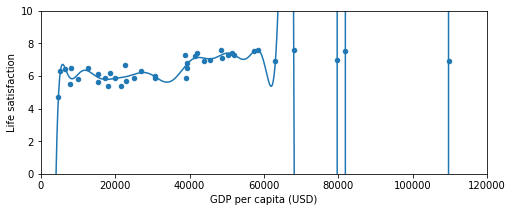

In [ ]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 120000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
plt.show()

모델 적합

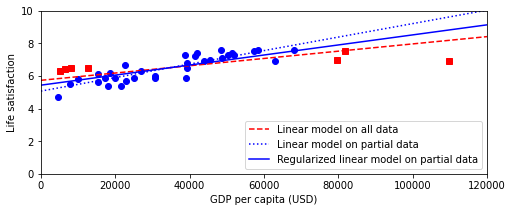

In [ ]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')


plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")


plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")


X = np.linspace(0, 120000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")


plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")


ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)


t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 120000, 0, 10])
plt.xlabel("GDP per capita (USD)")
plt.show()

사례 기반 학습

1인당 GDP가 키프로스랑 가까운 3개 국가는 (에스토니아, 슬로베니아, 스페인) 이다.

In [ ]:
sample_data[11:14]

,GDP per capita,Life satisfaction
Country,,
Estonia,22985.858,5.7
Slovenia,25038.792,5.9
Spain,26831.629,6.3


3개 국가의 삶의 만족도 평균 :

In [ ]:
(5.7+5.9+6.3)/3

5.966666666666668

 k-최근접 이웃 회귀모델을 적용

In [ ]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [ ]:
X = np.c_[sample_data["GDP per capita"]]
y = np.c_[sample_data["Life satisfaction"]]

# 모델 훈련
model.fit(X, y)

# 키프러스 국가에 대한 예측
X_new = np.array([[26240.0]])
print(model.predict(X_new))

[[5.96666667]]
